# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

 - 17 campaigns, between May 2008 and Nov 2010, corresponding to a total of 79k contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import time


In [36]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [31]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [32]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 12


In [37]:
df.info()
print(df['job'].value_counts())
df['marital'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

- The business goal is to find a model that can explain success of a contact, i.e. if the client subscribes to the deposit. Such models can
increase campaign efficiency by identifying the main characteristics that affect success, helping in better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:
bank_features = ['age', 'job', 'marital', 'education', 'default', 'loan'] 
X = df[bank_features]
X_encoded = pd.get_dummies(X, columns=['age', 'job', 'marital', 'education', 'default', 'loan'], drop_first=True)
y = df['y'].map({'yes': 1, 'no': 0})

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [13]:
baseline = y.value_counts(normalize=True).max()
print(f"Baseline accuracy (majority class): {baseline:.4f}")

Baseline accuracy (majority class): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

start = time.time()
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
lr_train_time = time.time() - start

y_pred = model.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

Train Accuracy: 0.8881942336874051
Test Accuracy: 0.8866229667394999
Confusion Matrix:
 [[7283   20]
 [ 914   21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.51      0.02      0.04       935

    accuracy                           0.89      8238
   macro avg       0.70      0.51      0.49      8238
weighted avg       0.85      0.89      0.84      8238



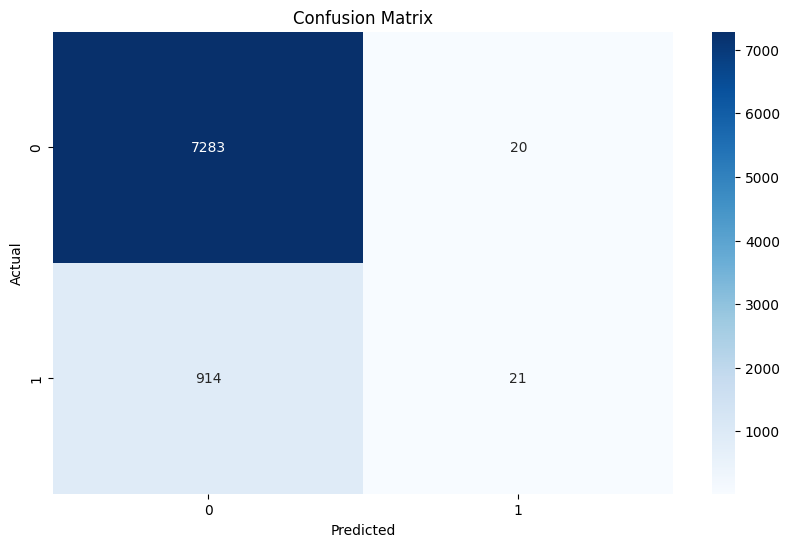

In [15]:
logreg_train_acc = model.score(X_train, y_train)
lr_accuracy = accuracy_score(y_test, y_pred)
print ("Train Accuracy:", logreg_train_acc)
print("Test Accuracy:", lr_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [16]:
#KNN Classifier
start = time.time()
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_pipe.fit(X_train, y_train)
knn_train_time = time.time() - start

y_pred = knn_pipe.predict(X_test)

In [17]:
knn_train_acc = knn_pipe.score(X_train, y_train)
knn_test_acc = knn_pipe.score(X_test, y_test)
print("KNN Training Time:", knn_train_time)
print("KNN Training Accuracy:", knn_train_acc)
print("KNN Test Accuracy:", knn_test_acc)

KNN Training Time: 0.05283784866333008
KNN Training Accuracy: 0.8874962063732929
KNN Test Accuracy: 0.8718135469774217


In [21]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dtree_train_time = time.time() - start
dtree_train_acc = dtree.score(X_train, y_train)
dtree_test_acc = dtree.score(X_test, y_test)
### END SOLUTION

print("Decision Tree Training Time:", dtree_train_time)
print(f'Training Accuracy: {dtree_train_acc: .2f}')
print(f'Test Accuracy: {dtree_test_acc: .2f}')


Decision Tree Training Time: 0.212996244430542
Training Accuracy:  0.91
Test Accuracy:  0.87


In [22]:
#SVM Classifier
from sklearn.svm import SVC
start = time.time()
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_train_time = time.time() - start

svm_train_acc = svm_model.score(X_train, y_train)
svm_test_acc = svm_model.score(X_test, y_test)

print("SVM Training Time:", svm_train_time)
print("SVM Training Accuracy:", svm_train_acc)
print("SVM Test Accuracy:", svm_test_acc)

SVM Training Time: 41.16553592681885
SVM Training Accuracy: 0.8891047040971168
SVM Test Accuracy: 0.8862588006797767


In [39]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': [lr_train_time, knn_train_time, dtree_train_time, svm_train_time],
    'Train Accuracy': [logreg_train_acc, knn_train_acc, dtree_train_acc, svm_train_acc],
    'Test Accuracy': [lr_accuracy, knn_test_acc, dtree_test_acc, svm_test_acc]
})
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.189729        0.888194       0.886623
1                  KNN    0.052838        0.887496       0.871814
2        Decision Tree    0.212996        0.907830       0.872663
3                  SVM   41.165536        0.889105       0.886259


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [27]:
#decision tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
best_model = grid_search.best_estimator_
best_depth = best_model.get_depth()
best_model_train_acc = best_model.score(X_train, y_train)
best_model_test_acc = best_model.score(X_test, y_test)

print("Best Model:", best_model)
print ("Best Model Depth:", best_depth)
print("Best Model Training Accuracy:", best_model_train_acc)
print("Best Model Test Accuracy:", best_model_test_acc)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8871927162367224
Best Model: DecisionTreeClassifier(max_depth=5, random_state=42)
Best Model Depth: 5
Best Model Training Accuracy: 0.8883763277693475
Best Model Test Accuracy: 0.8862588006797767


In [ ]:
#KNN hyperparameter tuning
from sklearn.model_selection import GridSearchCV

knn_params = {
    'knn__n_neighbors': [1, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree']
}

knn_grid_search = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5)
knn_grid_search.fit(X_train, y_train)

best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

print("Best KNN Parameters:", best_knn_params)
print("Best KNN Cross-Validation Score:", best_knn_score)
best_knn_model = knn_grid_search.best_estimator_
best_knn_model_train_acc = best_knn_model.score(X_train, y_train)
best_knn_model_test_acc = best_knn_model.score(X_test, y_test)

print("Best KNN Model:", best_knn_model)
print("Best KNN Model Training Accuracy:", best_knn_model_train_acc)
print("Best KNN Model Test Accuracy:", best_knn_model_test_acc)

Best KNN Parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Best KNN Cross-Validation Score: 0.8797875569044006
Best KNN Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])
Best KNN Model Training Accuracy: 0.8877086494688923
Best KNN Model Test Accuracy: 0.8787327021121631


In [ ]:
#Logistic Regression hyperparameter tuning
from sklearn.model_selection import GridSearchCV

logreg_params = [
    {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
    {'C': [0.01, 0.1, 1, 10], 'penalty': [None], 'solver': ['lbfgs']}
]

logreg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=logreg_params, cv=5)
logreg_grid_search.fit(X_train, y_train)

best_logreg_params = logreg_grid_search.best_params_
best_logreg_score = logreg_grid_search.best_score_

print("Best Logistic Regression Parameters:", best_logreg_params)
print("Best Logistic Regression Cross-Validation Score:", best_logreg_score)
best_logreg_model = logreg_grid_search.best_estimator_
best_logreg_model_train_acc = best_logreg_model.score(X_train, y_train)
best_logreg_model_test_acc = best_logreg_model.score(X_test, y_test)

print("Best Logistic Regression Model:", best_logreg_model)
print("Best Logistic Regression Model Training Accuracy:", best_logreg_model_train_acc)
print("Best Logistic Regression Model Test Accuracy:", best_logreg_model_test_acc)

In [12]:
#SVM hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'kernel': ['rbf', 'linear'],
    'gamma': [0.1, 1.0, 10.0]
}

grid = GridSearchCV(svm_model, param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)

print("Best SVM Parameters:", grid.best_params_)
print("Best SVM Cross-Validation Score:", grid.best_score_)
print("SVM Test Accuracy:", grid_score)
print("Best SVM Model Training Accuracy:", grid.best_estimator_.score(X_train, y_train))
print("Best SVM Model Test Accuracy:", grid.best_estimator_.score(X_test, y_test))

Best SVM Parameters: {'gamma': 0.1, 'kernel': 'rbf'}
Best SVM Cross-Validation Score: 0.8873748103186646
SVM Test Accuracy: 0.8866229667394999
Best SVM Model Training Accuracy: 0.8878603945371776
Best SVM Model Test Accuracy: 0.8866229667394999


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    """Prints classification report and ROC AUC for a given model."""
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.show()
    else:
        print("ROC AUC not available for this model.")

Evaluating Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.51      0.02      0.04       935

    accuracy                           0.89      8238
   macro avg       0.70      0.51      0.49      8238
weighted avg       0.85      0.89      0.84      8238

ROC AUC: 0.6552951281467363


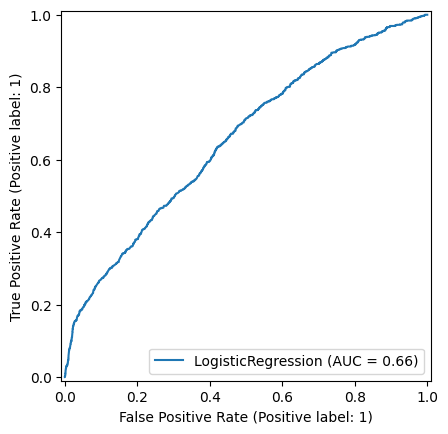

Evaluating KNN Model:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7303
           1       0.25      0.06      0.10       935

    accuracy                           0.87      8238
   macro avg       0.57      0.52      0.52      8238
weighted avg       0.82      0.87      0.84      8238

ROC AUC: 0.5896120633158595


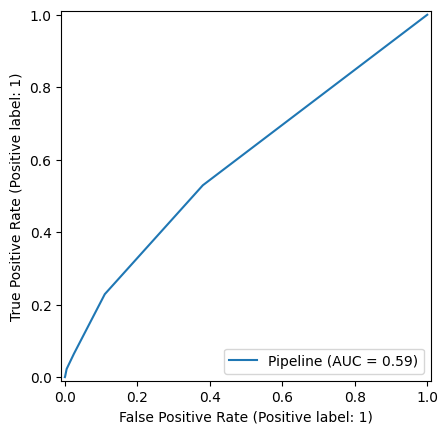

Evaluating Decision Tree Model:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7303
           1       0.26      0.07      0.10       935

    accuracy                           0.87      8238
   macro avg       0.57      0.52      0.52      8238
weighted avg       0.82      0.87      0.84      8238

ROC AUC: 0.6049223050229888


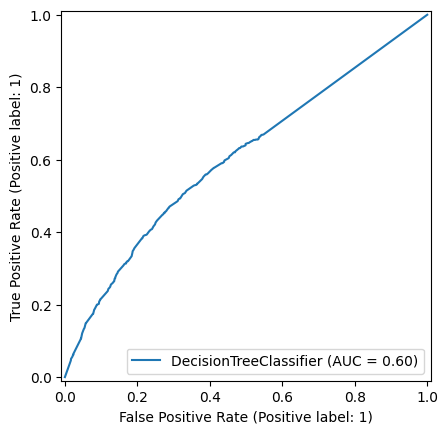

Evaluating SVM Model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.45      0.01      0.02       935

    accuracy                           0.89      8238
   macro avg       0.67      0.50      0.48      8238
weighted avg       0.84      0.89      0.84      8238

ROC AUC not available for this model.


In [ ]:
# Generate evaluation reports for all models
print("Evaluating Logistic Regression Model:")
evaluate_model(model, X_test, y_test)
print("Evaluating KNN Model:")
evaluate_model(knn_pipe, X_test, y_test)
print("Evaluating Decision Tree Model:")
evaluate_model(dtree, X_test, y_test)
print("Evaluating SVM Model:")
evaluate_model(svm_model, X_test, y_test)

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
summary = []
models = [
    ("Logistic Regression", model),
    ("KNN", knn_pipe),
    ("Decision Tree", dtree),
    ("SVM", svm_model)
 ]
for name, mdl in models:
    y_pred = mdl.predict(X_test)
    if hasattr(mdl, "predict_proba"):
        y_proba = mdl.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = "N/A"
    summary.append({
        "Model": name,
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc
    })
summary_df = pd.DataFrame(summary)
print(summary_df)

                 Model  Test Accuracy  Precision    Recall  F1-score   ROC AUC
0  Logistic Regression       0.886623   0.512195  0.022460  0.043033  0.655295
1                  KNN       0.871814   0.248963  0.064171  0.102041  0.589612
2        Decision Tree       0.872663   0.258475  0.065241  0.104184  0.604922
3                  SVM       0.886259   0.450000  0.009626  0.018848       N/A


/Users/nash.deshpande/Downloads/AIML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nash.deshpande/Downloads/AIML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nash.deshpande/Downloads/AIML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

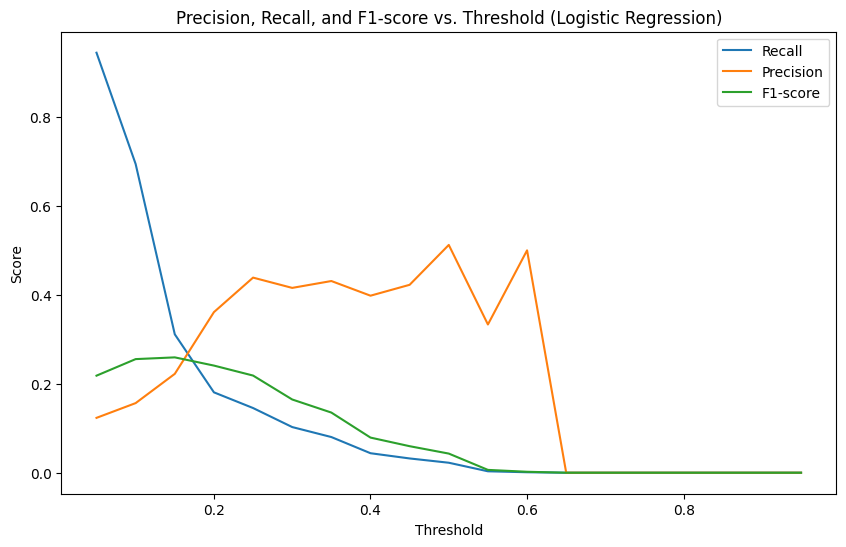

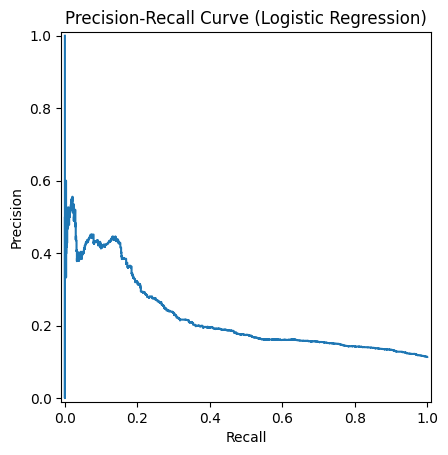

In [41]:
import numpy as np
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
thresholds = np.arange(0.05, 1.0, 0.05)
precisions = []
recalls = []
f1s = []
y_proba = model.predict_proba(X_test)[:, 1]
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))
plt.figure(figsize=(10,6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, f1s, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score vs. Threshold (Logistic Regression)')
plt.legend()
plt.show()
precision, recall, thresh = precision_recall_curve(y_test, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.show()

In [42]:
# Find threshold with highest F1-score
best_idx = np.argmax(f1s)
print(f'Best F1-score: {f1s[best_idx]:.3f} at threshold {thresholds[best_idx]:.2f}')
print(f'Precision: {precisions[best_idx]:.3f}, Recall: {recalls[best_idx]:.3f}')

# Find first threshold where recall >= 0.5
desired_recall = 0.5
found = False
for t, p, r, f in zip(thresholds, precisions, recalls, f1s):
    if r >= desired_recall:
        print(f'Threshold {t:.2f}: Precision={p:.3f}, Recall={r:.3f}, F1={f:.3f}')
        found = True
        break
if not found:
    print('No threshold found with recall >= 0.5')

Best F1-score: 0.259 at threshold 0.15
Precision: 0.222, Recall: 0.311
Threshold 0.05: Precision=0.123, Recall=0.944, F1=0.218


In [43]:
# Apply the threshold with highest F1-score to make final predictions
best_threshold = thresholds[best_idx]
y_pred_final = (y_proba >= best_threshold).astype(int)
from sklearn.metrics import classification_report, confusion_matrix
print(f'Classification report for threshold {best_threshold:.2f}:')
print(classification_report(y_test, y_pred_final))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_final))

Classification report for threshold 0.15:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7303
           1       0.22      0.31      0.26       935

    accuracy                           0.80      8238
   macro avg       0.56      0.59      0.57      8238
weighted avg       0.83      0.80      0.81      8238

Confusion matrix:
[[6285 1018]
 [ 644  291]]


##### Questions